# SSH model

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

$H=\sum_{j}\left[(1-\delta) c_{A, j}^{\dagger} c_{B, j}+(1+\delta) c_{B, j}^{\dagger} c_{A, j+1}+\text { h.c. }\right]$

In [2]:
def SSH_hamiltonian_periodic(N, Delta):
    x = np.zeros(N-1)
    x[0::2] = 1 - Delta
    x[1::2] = 1 + Delta
    A = np.diag(x, k = 1) + np.diag(x, k = -1)
    A[0][N-1] = 1 + Delta
    A[N-1][0] = 1 + Delta
    return A

In [3]:
SSH_hamiltonian_periodic(4, 1)

array([[0., 0., 0., 2.],
       [0., 0., 2., 0.],
       [0., 2., 0., 0.],
       [2., 0., 0., 0.]])

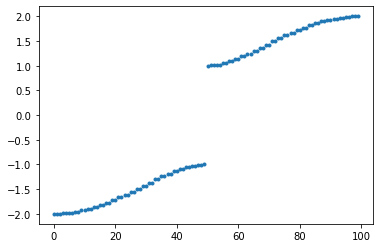

In [4]:
Delta = 0.5
N = 100
A_SSH = SSH_hamiltonian_periodic(N, Delta)
plt.plot(np.sort(np.linalg.eigvals(A_SSH)), ".")

In [5]:
def SSH_hamiltonian_open(N, Delta):
    x = np.zeros(N-1)
    x[0::2] = 1 - Delta
    x[1::2] = 1 + Delta
    A = np.diag(x, k = 1) + np.diag(x, k = -1)
    return A

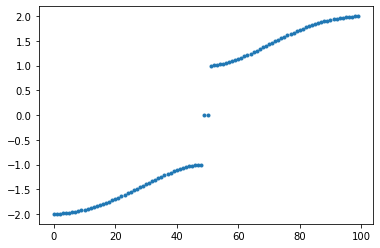

In [6]:
A1_SSH = SSH_hamiltonian_open(N, Delta)
plt.plot(np.sort(np.linalg.eigvals(A1_SSH)), ".")

In [7]:
SSH_hamiltonian_open(10, 1)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 2., 0., 0., 0., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 2., 0., 0., 0., 0., 0.],
       [0., 0., 0., 2., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 2., 0., 0., 0.],
       [0., 0., 0., 0., 0., 2., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 2., 0.],
       [0., 0., 0., 0., 0., 0., 0., 2., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

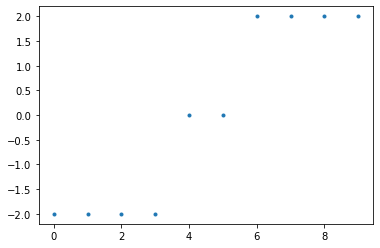

In [8]:
plt.plot(np.sort(np.linalg.eigvals(SSH_hamiltonian_open(10, 1))), ".")

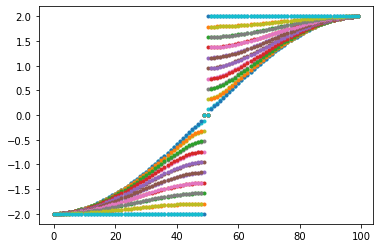

In [9]:
x = np.linspace(-1, 1, 20)
A_matrices_spec = []
for i in range(x.size):
    Delta = x[i]
    A_SSH = SSH_hamiltonian_open(N, Delta)
    A_matrices_spec.append(np.sort(np.linalg.eigvals(A_SSH)))
    plt.plot(A_matrices_spec[i], ".")
A_matrices_spec = np.array(A_matrices_spec)

In [10]:
def energy_gap(arr):
    N = arr.size
    return arr[N//2] - arr[N//2 - 1]

Text(0, 0.5, 'Energy gap')

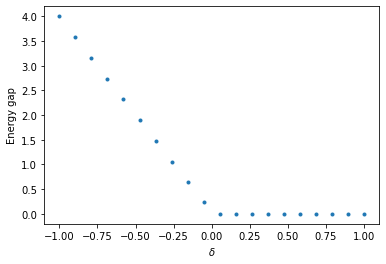

In [11]:
gap_array = np.array([energy_gap(A_matrices_spec[i]) for i in range(20)])
plt.plot(x, gap_array, ".")
plt.xlabel('$\delta$')
plt.ylabel('Energy gap')

In [12]:
A_matrices_spec_N = []
Delta = 0.5
for i in range(2,100,2):
    N = i
    A_SSH_N = SSH_hamiltonian_open(N, Delta)
    A_matrices_spec_N.append(np.sort(np.linalg.eigvals(A_SSH_N)))
A_matrices_spec_N = np.array(A_matrices_spec_N)

C:\Users\MI\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys


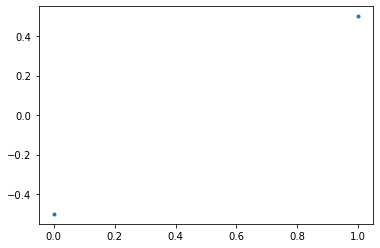

In [13]:
plt.plot(np.sort(np.linalg.eigvals(SSH_hamiltonian_open(2, 0.5))), ".")

Text(0, 0.5, 'Energy gap')

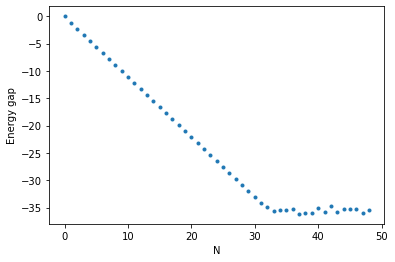

In [14]:
gap_array = np.log(np.array([energy_gap(A_matrices_spec_N[i]) for i in range(49)]))
plt.plot(gap_array,".")
plt.xlabel("N")
plt.ylabel('Energy gap')

In [15]:
np.log(1e-14)

-32.23619130191664

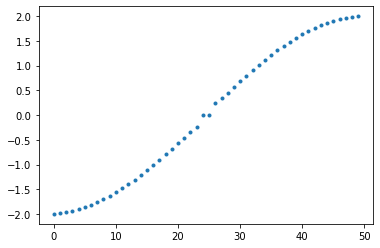

In [16]:
plt.plot(np.sort(np.linalg.eigvals(SSH_hamiltonian_open(50, 0.1))),".")

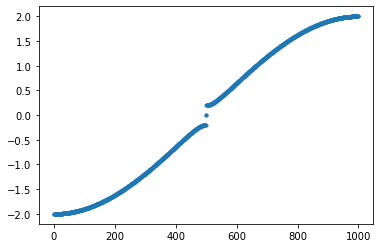

In [17]:
plt.plot(np.sort(np.linalg.eigvals(SSH_hamiltonian_open(1000, 0.1))),".")

### Density of one state

In [18]:
#sorting eigenvalues and corresponding eigenvectors
delta1 = 0.05
eigenvalues, eigenvectors = np.linalg.eig(SSH_hamiltonian_open(200, delta1))
idx = eigenvalues.argsort()[::1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

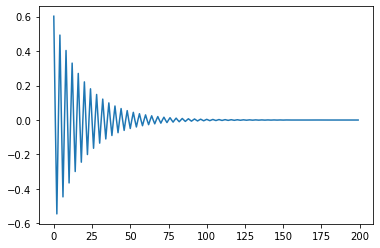

In [19]:
plt.plot(eigenvectors[:,99] + eigenvectors[:,100])

localization length = 9.991661103824155


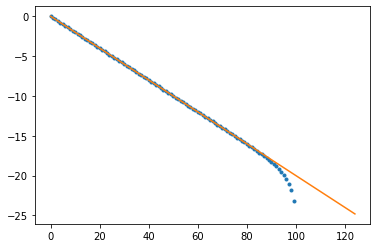

In [20]:
x1 = (eigenvectors[:,100][0] + eigenvectors[:,99][0])**2
amp_spec = np.log((1/x1)*(eigenvectors[:,100] + eigenvectors[:,99])**2)
plt.plot(amp_spec[0::2], ".")
chi = 1 / (np.log(1 + delta1) - np.log(1 - delta1))
plt.plot([(-x+1)*2/chi for x in range(1,126)])
print("localization length =", chi)

## Perturbations

In [21]:
def SSH_hamiltonian_open_random(N, Delta, R):
    x = np.zeros(N-1)
    for i in range(N-1):
        if i%2 == 0:
            x[i] = 1 - Delta + np.random.uniform(low=-R, high=R, size=(1,))
        else:
            x[i] = 1 + Delta + np.random.uniform(low=-R, high=R, size=(1,))
    A = np.diag(x, k = 1) + np.diag(x, k = -1)
    return A

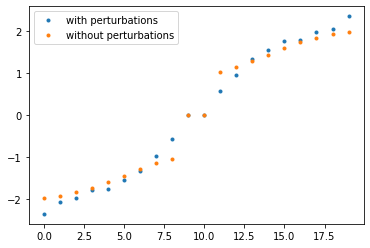

In [22]:
Delta = 0.5
N = 20
R = 0.5
A_SSH = SSH_hamiltonian_open_random(N, Delta, R)
plt.plot(np.sort(np.linalg.eigvals(A_SSH)), ".", label = "with perturbations")
plt.plot(np.sort(np.linalg.eigvals(SSH_hamiltonian_open(N, Delta))), ".", label = "without perturbations")
plt.legend()

## Next nearest neighbor hopping 

\begin{aligned}
H=\sum_{j} &\left[(1-\delta) c_{A, j}^{\dagger} c_{B, j}+(1+\delta) c_{B, j}^{\dagger} c_{A, j+1}\right.\\
&\left.+t c_{A, j}^{\dagger} c_{A, j+1}+\text { h.c. }\right]
\end{aligned}

In [23]:
def SSH_hamiltonian_NNN_hopping(N, Delta, t):
    x = np.zeros(N-1)
    t_array = np.zeros(N-2)
    x[0::2] = 1 - Delta
    x[1::2] = 1 + Delta
    t_array[0::2] = t 
    A = np.diag(x, k = 1) + np.diag(x, k = -1) + np.diag(t_array, k = -2) + np.diag(t_array, k = 2) 
    return A

In [24]:
SSH_hamiltonian_NNN_hopping(6, 0.5, 10)

array([[ 0. ,  0.5, 10. ,  0. ,  0. ,  0. ],
       [ 0.5,  0. ,  1.5,  0. ,  0. ,  0. ],
       [10. ,  1.5,  0. ,  0.5, 10. ,  0. ],
       [ 0. ,  0. ,  0.5,  0. ,  1.5,  0. ],
       [ 0. ,  0. , 10. ,  1.5,  0. ,  0.5],
       [ 0. ,  0. ,  0. ,  0. ,  0.5,  0. ]])

<Figure size 432x288 with 0 Axes>

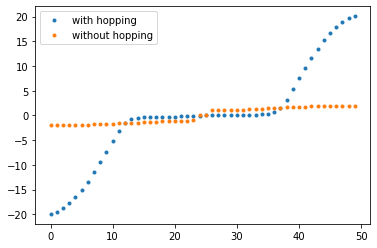

<Figure size 432x288 with 0 Axes>

In [25]:
Delta = 0.5
t = 10
N = 50
A_SSH_new1 = SSH_hamiltonian_NNN_hopping(N, Delta, t)
plt.plot(np.sort(np.linalg.eigvals(A_SSH_new1)), ".",label = "with hopping")
plt.plot(np.sort(np.linalg.eigvals(SSH_hamiltonian_open(N, Delta))),".", label = "without hopping")
plt.legend()
plt.figure()

Adding a similar next nearest neighbor hopping between B sites (with the same amplitude t)

In [26]:
def SSH_hamiltonian_NNN_hoppingAB(N, Delta, t):
    x = np.zeros(N-1)
    t_array = np.zeros(N-2)
    x[0::2] = 1 - Delta
    x[1::2] = 1 + Delta
    t_array[::] = t 
    A = np.diag(x, k = 1) + np.diag(x, k = -1) + np.diag(t_array, k = -2) + np.diag(t_array, k = 2) 
    return A

In [27]:
SSH_hamiltonian_NNN_hoppingAB(10, 0.5, 1)

array([[0. , 0.5, 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.5, 0. , 1.5, 1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 1.5, 0. , 0.5, 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 1. , 0.5, 0. , 1.5, 1. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 1.5, 0. , 0.5, 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 1. , 0.5, 0. , 1.5, 1. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. , 1.5, 0. , 0.5, 1. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. , 0.5, 0. , 1.5, 1. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. , 1.5, 0. , 0.5],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0.5, 0. ]])

<Figure size 432x288 with 0 Axes>

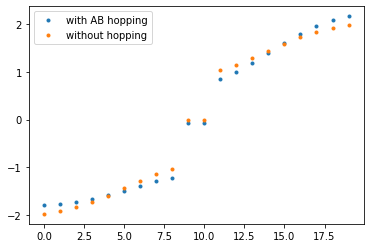

<Figure size 432x288 with 0 Axes>

In [28]:
Delta = 0.5
t = 0.1
N = 20
A_SSH_new = SSH_hamiltonian_NNN_hoppingAB(N, Delta, t)
plt.plot(np.sort(np.linalg.eigvals(A_SSH_new)), ".", label = "with AB hopping")
plt.plot(np.sort(np.linalg.eigvals(SSH_hamiltonian_open(N, Delta))), ".", label = "without hopping")
plt.legend()
plt.figure()